# Masks : land-sea and relief

The aim of this notebook is to indicate how to read the data from masks. For each geographical zone (North-West (NW) of France and South-East (SE) of France), two different masks are stored in a GRIB file:

* the **land-sea mask**, stored in the ```lsm``` field. The values are binary : 0 for sea and 1 for land.

* the **relief mask**, stored in the ```p3008``` field. The values are in meters.


The spatial resolution is 0.025°. 
These data are constant fields which come from the fine-mesh french weather model called 'AROME'.

Note : When you open a GRIB file with the library xarray, a new associated file of type .idx is created. 

For more information, cf [documentation](https://meteofrance.github.io/meteonet/english/data/land-relief-masks/). 

In [1]:
import meteonet_toolbox.user_configuration 
import xarray as xr
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

User is not known. If you experiment some problems with path for library please add the specific path in `user_configuration.py` module


Select the area you want to study :

In [2]:
zone = "SE"
fname = "../../data_samples/masks/%s_masks.grib" % (zone)

Open the GRIB file :

In [3]:
data = xr.open_dataset(fname, engine='cfgrib')

## Simple plots

<IPython.core.display.Javascript object>


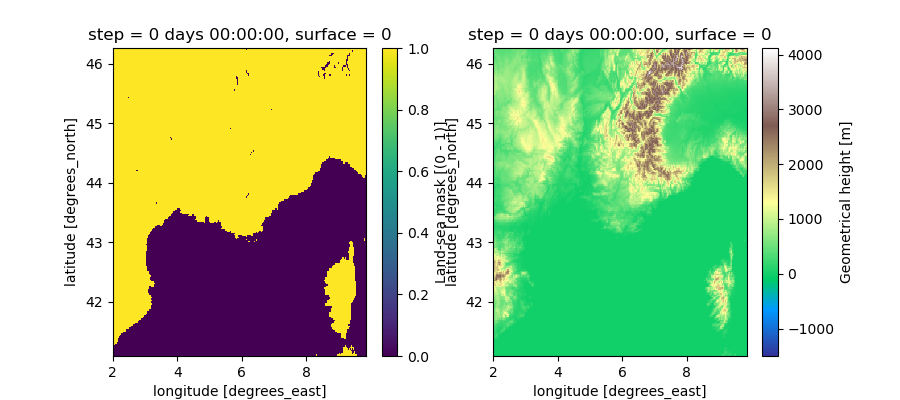

In [4]:
fig, axs = plt.subplots(1,2, figsize=(9,4))

# Plot the land-sea mask
data["lsm"].plot(ax=axs[0])

# Plot the relief mask
vmax = data["p3008"].values.max()
data["p3008"].plot(ax=axs[1], cmap='terrain', vmin=-1500, vmax=vmax)

plt.show()

## Exploring the xarray grid format
Overview of the data and metadata : 

In [5]:
data

<xarray.Dataset>
Dimensions:    (latitude: 207, longitude: 315)
Coordinates:
    step       timedelta64[ns] ...
    surface    int64 ...
  * latitude   (latitude) float64 46.25 46.23 46.2 46.18 ... 41.15 41.13 41.1
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Data variables:
    lsm        (latitude, longitude) float32 ...
    p3008      (latitude, longitude) float32 489.9793 ... -0.00016784668
Attributes:
    GRIB_edition:            1
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2021-03-31T16:47:38 GRIB to CDM+CF via cfgrib-0....

Print information about the coordinates (latitude and longitude):

In [6]:
coord = 'longitude'
data[coord]

<xarray.DataArray 'longitude' (longitude: 315)>
array([2.   , 2.025, 2.05 , ..., 9.8  , 9.825, 9.85 ])
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    int64 0
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude

In [7]:
data[coord].units

'degrees_east'

In [8]:
data[coord].values

array([2.   , 2.025, 2.05 , 2.075, 2.1  , 2.125, 2.15 , 2.175, 2.2  ,
       2.225, 2.25 , 2.275, 2.3  , 2.325, 2.35 , 2.375, 2.4  , 2.425,
       2.45 , 2.475, 2.5  , 2.525, 2.55 , 2.575, 2.6  , 2.625, 2.65 ,
       2.675, 2.7  , 2.725, 2.75 , 2.775, 2.8  , 2.825, 2.85 , 2.875,
       2.9  , 2.925, 2.95 , 2.975, 3.   , 3.025, 3.05 , 3.075, 3.1  ,
       3.125, 3.15 , 3.175, 3.2  , 3.225, 3.25 , 3.275, 3.3  , 3.325,
       3.35 , 3.375, 3.4  , 3.425, 3.45 , 3.475, 3.5  , 3.525, 3.55 ,
       3.575, 3.6  , 3.625, 3.65 , 3.675, 3.7  , 3.725, 3.75 , 3.775,
       3.8  , 3.825, 3.85 , 3.875, 3.9  , 3.925, 3.95 , 3.975, 4.   ,
       4.025, 4.05 , 4.075, 4.1  , 4.125, 4.15 , 4.175, 4.2  , 4.225,
       4.25 , 4.275, 4.3  , 4.325, 4.35 , 4.375, 4.4  , 4.425, 4.45 ,
       4.475, 4.5  , 4.525, 4.55 , 4.575, 4.6  , 4.625, 4.65 , 4.675,
       4.7  , 4.725, 4.75 , 4.775, 4.8  , 4.825, 4.85 , 4.875, 4.9  ,
       4.925, 4.95 , 4.975, 5.   , 5.025, 5.05 , 5.075, 5.1  , 5.125,
       5.15 , 5.175,

Example for the land-sea mask:

In [9]:
data['lsm']

<xarray.DataArray 'lsm' (latitude: 207, longitude: 315)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
    step       timedelta64[ns] 00:00:00
    surface    int64 0
  * latitude   (latitude) float64 46.25 46.23 46.2 46.18 ... 41.15 41.13 41.1
  * longitude  (longitude) float64 2.0 2.025 2.05 2.075 ... 9.775 9.8 9.825 9.85
Attributes:
    GRIB_paramId:                             172
    GRIB_shortName:                           lsm
    GRIB_units:                               (0 - 1)
    GRIB_name:                                Land-sea mask
    GRIB_cfName:                              land_binary_mask
    GRIB_cfVarName:                           lsm
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      65205
    GRIB_typeOfLevel:                         surface
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/Longitude Grid
    GRIB_Nx:                                  315
    GRIB_iDirectionIncrementInDegrees:        0.025
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  2.0
    GRIB_longitudeOfLastGridPointInDegrees:   9.85
    GRIB_Ny:                                  207
    GRIB_jDirectionIncrementInDegrees:        0.025
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   46.25
    GRIB_latitudeOfLastGridPointInDegrees:    41.1
    long_name:                                Land-sea mask
    units:                                    (0 - 1)
    standard_name:                            land_binary_mask

## Plotting the masks with Cartopy

In [10]:
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [11]:
# Coordinates of studied area boundaries
lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

<IPython.core.display.Javascript object>


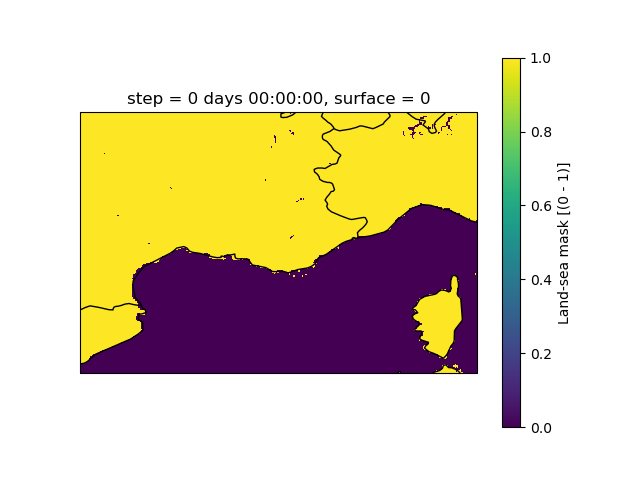

In [12]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
data["lsm"].plot()

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()

<IPython.core.display.Javascript object>


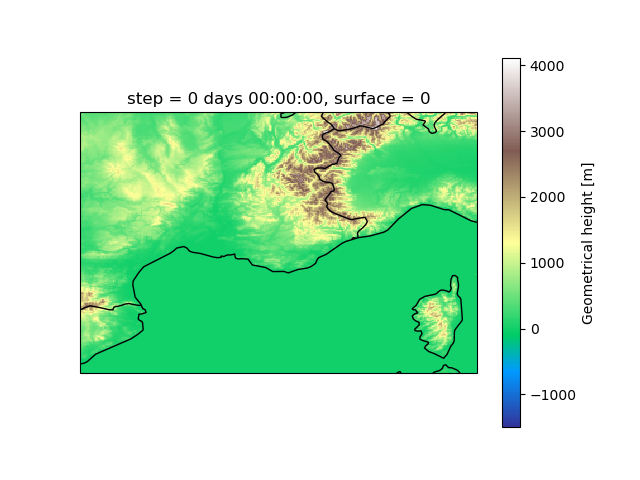

In [13]:
fig = plt.figure()

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
vmax = data["p3008"].values.max()
data["p3008"].plot(cmap='terrain', vmin=-1500, vmax=vmax)

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()